# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
ds = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [3]:
import math
N = 600 # Checking for min. no. of rounds to get the correct result, starting from 10k
d = 10
ad_selected = []
nos = [0] * d # numbers_of_selections of ad i upto round n
sor = [0] * d # sums_of_rewards of ad i upto round n
total_reward = 0
for n in range(N):
  ad = 0
  max_upper_bound = 0
  for i in range(d):
    if nos[i] > 0:
      average_reward = sor[i]/nos[i]
      delta_i = math.sqrt(3/2*math.log(n+1)/nos[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400

    if(upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i

  ad_selected.append(ad)
  nos[ad] += 1
  reward = ds.values[n, ad]
  sor[ad] = sor[ad] + reward
  total_reward = total_reward + reward


## Visualising the results

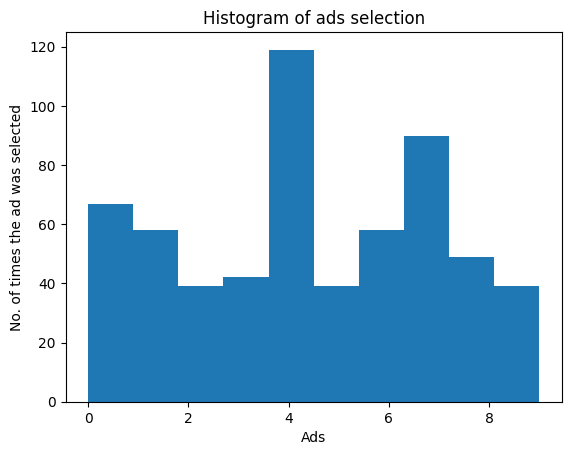

In [4]:
plt.hist(ads_selected)
plt.title("Histogram of ads selection")
plt.xlabel('Ads')
plt.ylabel('No. of times the ad was selected')
plt.show()